In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import SVC

In [3]:
def load_data():
    # Generate data uniformly distributed in a unit square [0,1]^2
    x = np.random.uniform(low=0.0, high=1.0, size=(5000, 2))
    
    # Target variable: 1 if inside the unit circle, 0 otherwise
    r = np.linalg.norm(x, axis=-1)  # Euclidean distance from origin (0,0)
    y = (r < 1).astype(np.float32)  # True if inside the unit circle
    return x, y

In [4]:
def plot_decision_boundary(model, X, y):
    # Create a grid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Make predictions over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour of the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25, cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundary")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()


XGBoost Model:
Training Accuracy: 0.9995
Testing Accuracy: 0.9890


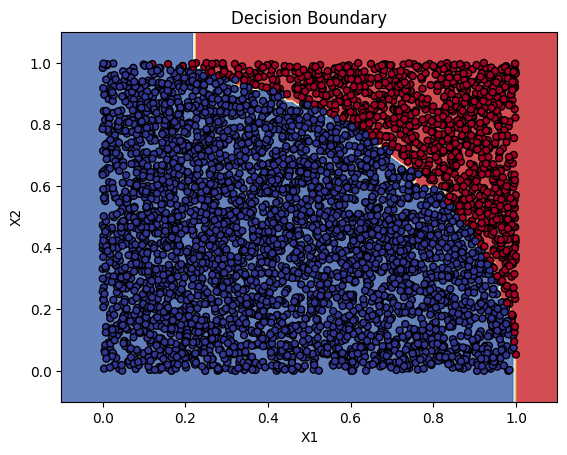


SVM Model:
Training Accuracy: 0.9902
Testing Accuracy: 0.9810


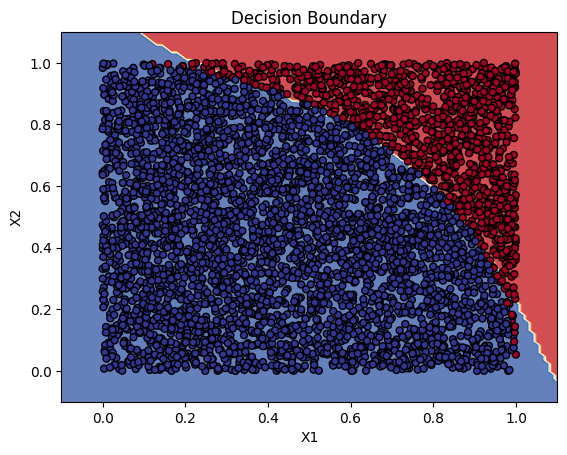

In [5]:
def main():
    # Load data
    X, y = load_data()

    # Randomly split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Using XGBoost Classifier
    print("XGBoost Model:")
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)
    train_pred = xgb_model.predict(X_train)
    train_accuracy = (train_pred == y_train).mean()
    print(f"Training Accuracy: {train_accuracy:.4f}")
    test_pred = xgb_model.predict(X_test)
    test_accuracy = (test_pred == y_test).mean()
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    
    # Plot the decision boundary for XGBoost
    plot_decision_boundary(xgb_model, X, y)

    # Using Support Vector Machine (SVM)
    print("\nSVM Model:")
    svc_model = SVC()
    svc_model.fit(X_train, y_train)
    train_pred = svc_model.predict(X_train)
    train_accuracy = (train_pred == y_train).mean()
    print(f"Training Accuracy: {train_accuracy:.4f}")
    test_pred = svc_model.predict(X_test)
    test_accuracy = (test_pred == y_test).mean()
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    
    # Plot the decision boundary for SVM
    plot_decision_boundary(svc_model, X, y)

if __name__ == "__main__":
    main()
